# Fuzzy Matching
## Gregory Glatzer

This notebook was used to develop the fuzzy matching technique. The code in this notebook was used to generate the centroid files used in the streamlit application mentioned in the research paper. This is the culmination of the research, with the final, polished code developed in the other notebooks existing in the `utils.utils` library imported in the first block of code.

In [1]:
import sys; sys.path.insert(0, '..')
from utils.utils import * # code from other notebooks exists in the utils directory
import warnings
warnings.filterwarnings("ignore")

In [2]:
def run_algorithm(data, fuzzy=True):
    """
    The most comprehensive form of the DBSCAN algorithm with appended historical weather station data. This function will
    run DBSCAN on the given data, as well as calculate temperature from weather stations. 
    
    Parameters
    -----------
    
    data: (DataFrame) Contains at least the columns ["location-lat", "location-long", "timestamp", "tag-local-identifier"].
    fuzzy: (bool, optional) Toggle fuzzy matching, as described in the research paper. Default True.
    
    
    Returns
    -----------
    centroids: (DataFrame) The centroids calculated (mean of values in given cluster). This is both Temp-Influenced and Without Temp-Influence.
    clusters: (DataFrame) The clusters calculated. This is only Without Temp-Influence, as the Temp-Influenced clusters are not too useful to visualize.
    percents_found: (list) List of percents of timestamps matched for each unique tag-local-identifier (in the order of data["tag-local-identifier"].unique())
    """

    centroids = None
    clusters = None
    
    all_centroids = []
    all_clusters = []
    percents_found = []

    for id, group, in data.groupby("tag-local-identifier"):
        print(id)

        station_data, station, extra = get_station_temps(group, fuzzy=fuzzy)

        # move in if no stations were found
        if station_data is None:
            print("\n")
            continue

        # calculate percent of timestamps we found temp data for
        percent_found = station_data[station_data["stationTemp"].notna()].shape[0] / group.shape[0] * 100
        print("Timestamps found: ", str(round(percent_found, 3)) + "%") 
        percents_found.append(percent_found)

        
        (clusters_heat, centroids_heat), (clusters_wo, centroids_wo) = with_and_without_heat(station_data,
#                                                                                              r_heat=0.2, mp_heat=25, 
#                                                                                              r_wo=0.06, mp_wo=45
                                                                                             )
        centroids = centroids_heat.append(centroids_wo)
        print(f"Temp-Influenced centroids: {centroids_heat.shape[0]}")
        print(f"Without Temp-Influenced centroids: {centroids_wo.shape[0]}")
        print("\n")

        centroids["tag-local-identifier"] = id

        all_centroids.append(centroids)
        all_clusters.append(clusters_wo)
        
    if all_centroids != []:
        centroids = pd.concat(all_centroids, ignore_index=True)
    if all_clusters != []:
        clusters = pd.concat(all_clusters, ignore_index=True)
        
    
        
    return centroids, clusters, percents_found
                         

Here we run load each dataset, and observe the differences in fuzzy vs non-fuzzy matching.

In [3]:
# data, reference = load_movebank_data("African elephants in Etosha National Park (data from Tsalyuk et al. 2018)")
#data, reference = load_movebank_data("Elliptical Time-Density Model (Wall et al. 2014) African Elephant Dataset (Source-Save the Elephants)")
#data, reference = load_movebank_data("Forest Elephant Telemetry Programme")
data, reference = load_movebank_data("ThermochronTracking Elephants Kruger 2007")

AM105
Using station data from Station(wmo = 67341) at distance 1.229
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  80.653%
Calculating temp-influenced clusters and centroids (12177, 13)
Calculating without-temp clusters and centroids (15098, 13)
Temp-Influenced centroids: 9
Without Temp-Influenced centroids: 13




No handles with labels found to put in legend.


AM105
Using station data from Station(wmo = 67341) at distance 1.229
Timestamps found:  80.653%
Calculating temp-influenced clusters and centroids (12177, 13)
Calculating without-temp clusters and centroids (15098, 13)
Temp-Influenced centroids: 9
Without Temp-Influenced centroids: 13




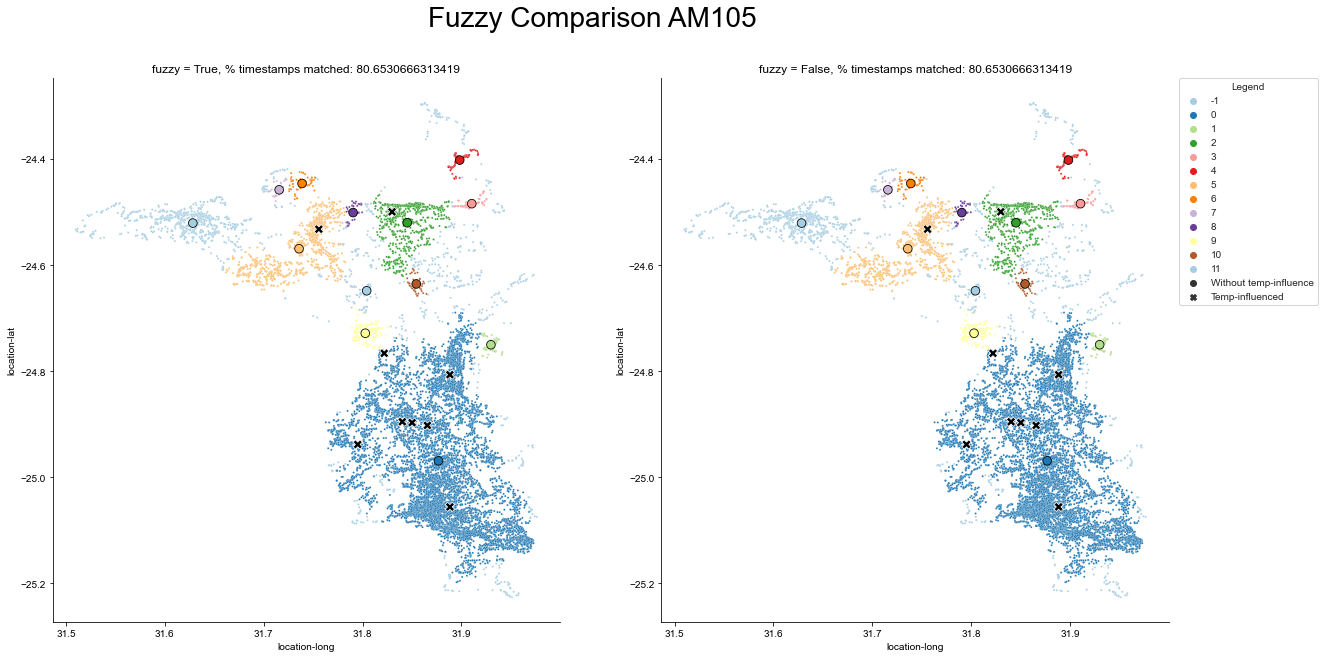

AM107
Using station data from Station(wmo = 67341) at distance 1.489
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  81.153%
Calculating temp-influenced clusters and centroids (8758, 13)
Calculating without-temp clusters and centroids (10792, 13)
Temp-Influenced centroids: 9
Without Temp-Influenced centroids: 14




No handles with labels found to put in legend.


AM107
Using station data from Station(wmo = 67341) at distance 1.489
Timestamps found:  81.153%
Calculating temp-influenced clusters and centroids (8758, 13)
Calculating without-temp clusters and centroids (10792, 13)
Temp-Influenced centroids: 9
Without Temp-Influenced centroids: 14




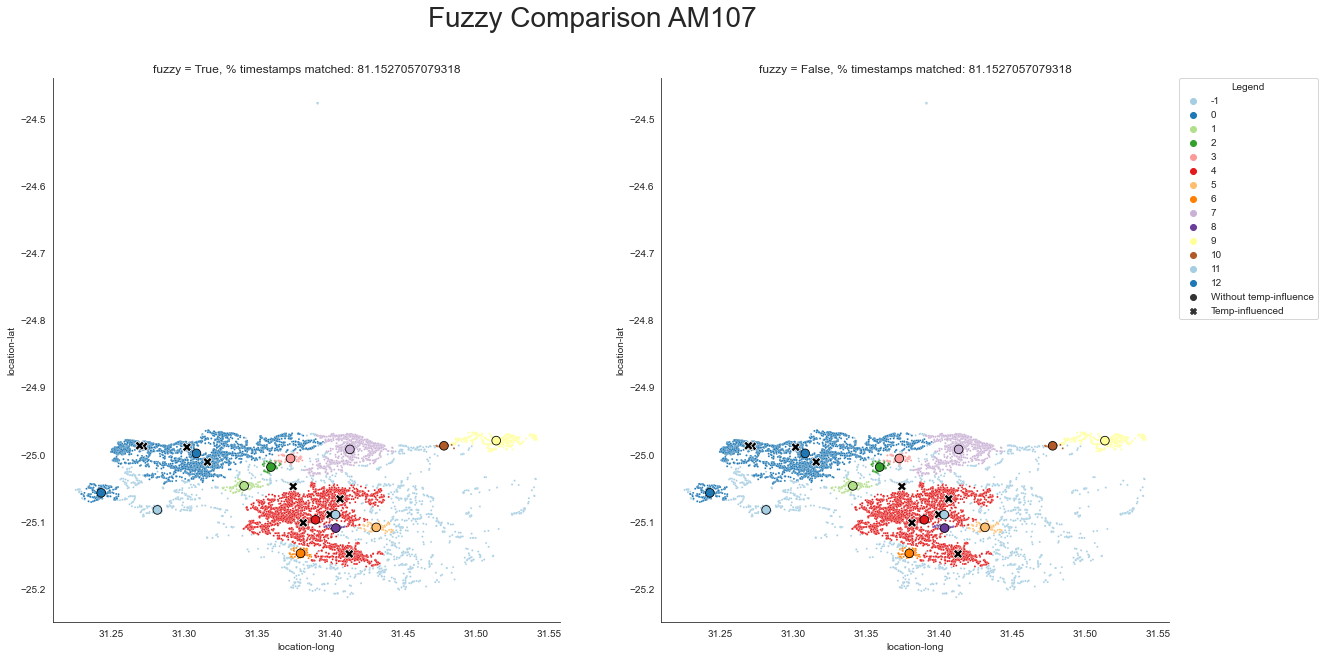

AM108
Using station data from Station(wmo = 67341) at distance 1.427
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  44.353%
Calculating temp-influenced clusters and centroids (7049, 13)
Calculating without-temp clusters and centroids (15893, 13)


No handles with labels found to put in legend.


Temp-Influenced centroids: 5
Without Temp-Influenced centroids: 8


AM108
Using station data from Station(wmo = 67341) at distance 1.427
Timestamps found:  44.353%
Calculating temp-influenced clusters and centroids (7049, 13)
Calculating without-temp clusters and centroids (15893, 13)
Temp-Influenced centroids: 5
Without Temp-Influenced centroids: 8




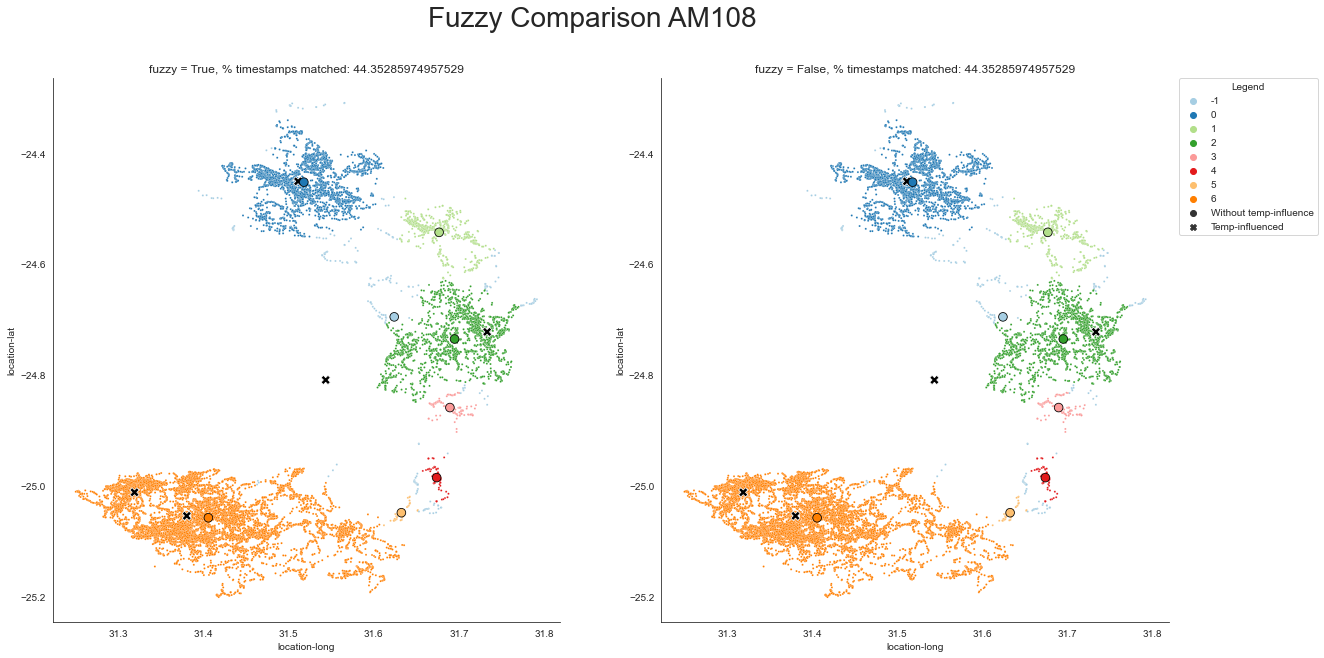

AM110
Using station data from Station(wmo = 68288) at distance 1.348
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  67.739%
Calculating temp-influenced clusters and centroids (17864, 13)
Calculating without-temp clusters and centroids (26372, 13)


No handles with labels found to put in legend.


Temp-Influenced centroids: 14
Without Temp-Influenced centroids: 17


AM110
Using station data from Station(wmo = 68288) at distance 1.348
Timestamps found:  67.739%
Calculating temp-influenced clusters and centroids (17864, 13)
Calculating without-temp clusters and centroids (26372, 13)
Temp-Influenced centroids: 14
Without Temp-Influenced centroids: 17




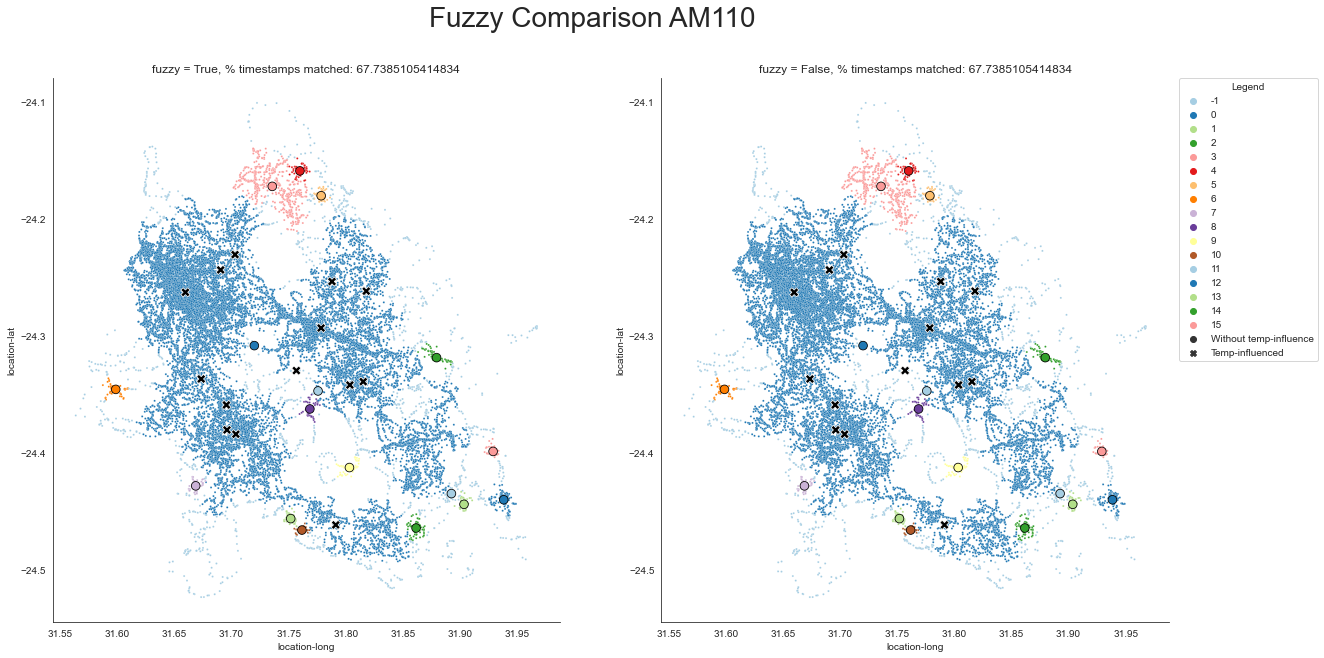

AM239
Using station data from Station(wmo = 68288) at distance 0.991
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  64.97%
Calculating temp-influenced clusters and centroids (15787, 13)
Calculating without-temp clusters and centroids (24299, 13)
Temp-Influenced centroids: 7
Without Temp-Influenced centroids: 10




No handles with labels found to put in legend.


AM239
Using station data from Station(wmo = 68288) at distance 0.991
Timestamps found:  64.97%
Calculating temp-influenced clusters and centroids (15787, 13)
Calculating without-temp clusters and centroids (24299, 13)
Temp-Influenced centroids: 7
Without Temp-Influenced centroids: 10




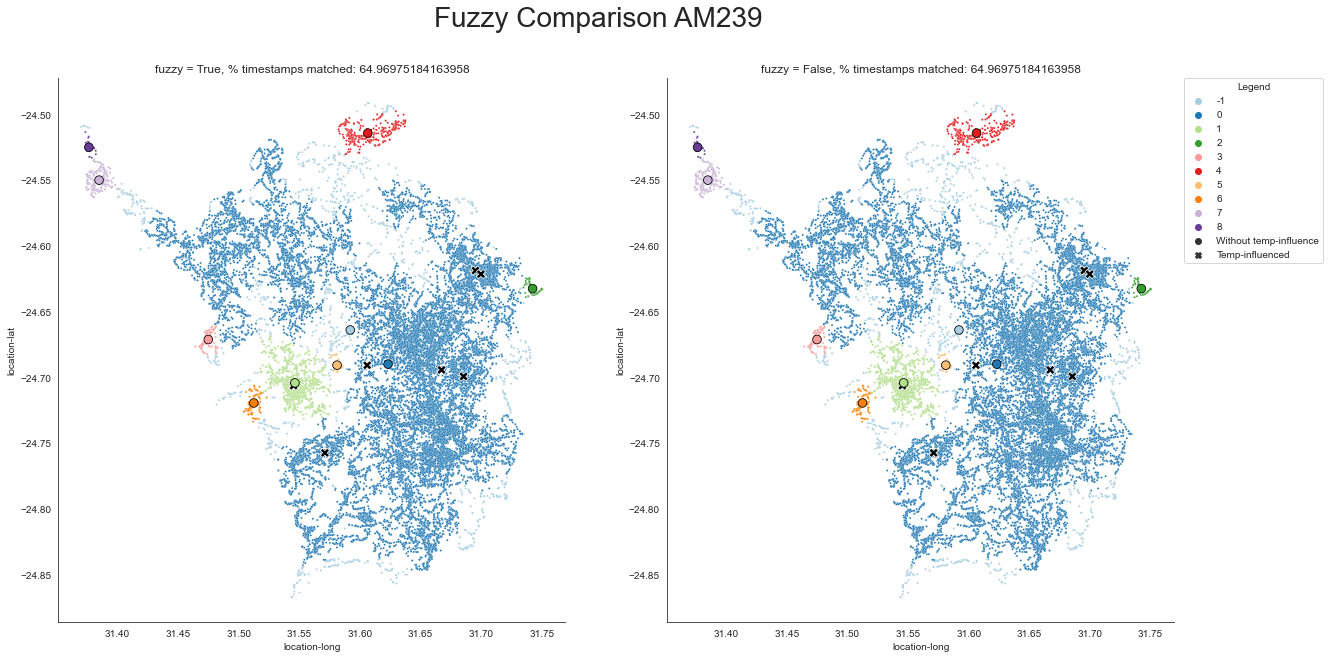

AM253
Using station data from Station(wmo = 68288) at distance 1.073
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  63.882%
Calculating temp-influenced clusters and centroids (13067, 13)
Calculating without-temp clusters and centroids (20455, 13)


No handles with labels found to put in legend.


Temp-Influenced centroids: 14
Without Temp-Influenced centroids: 16


AM253
Using station data from Station(wmo = 68288) at distance 1.073
Timestamps found:  63.882%
Calculating temp-influenced clusters and centroids (13067, 13)
Calculating without-temp clusters and centroids (20455, 13)
Temp-Influenced centroids: 14
Without Temp-Influenced centroids: 16




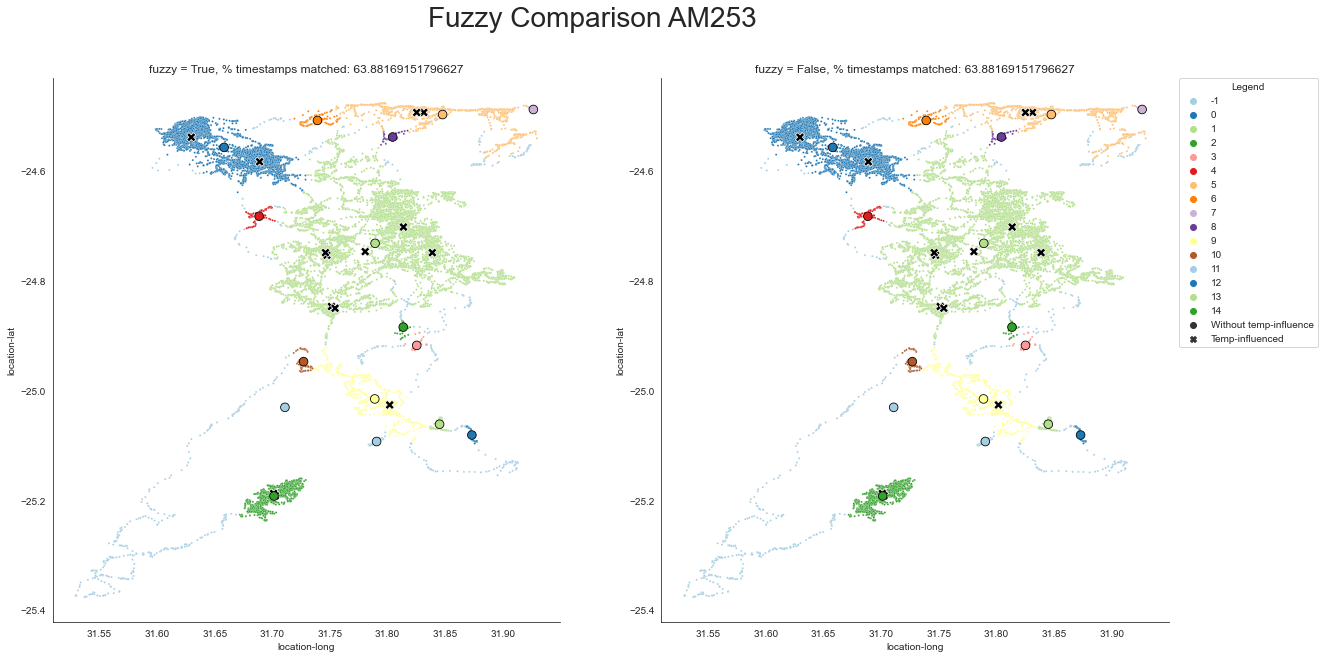

AM254
Using station data from Station(wmo = 67341) at distance 1.399
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  82.506%
Calculating temp-influenced clusters and centroids (19851, 13)
Calculating without-temp clusters and centroids (24060, 13)


No handles with labels found to put in legend.


Temp-Influenced centroids: 22
Without Temp-Influenced centroids: 19


AM254
Using station data from Station(wmo = 67341) at distance 1.399
Timestamps found:  82.506%
Calculating temp-influenced clusters and centroids (19851, 13)
Calculating without-temp clusters and centroids (24060, 13)
Temp-Influenced centroids: 22
Without Temp-Influenced centroids: 19




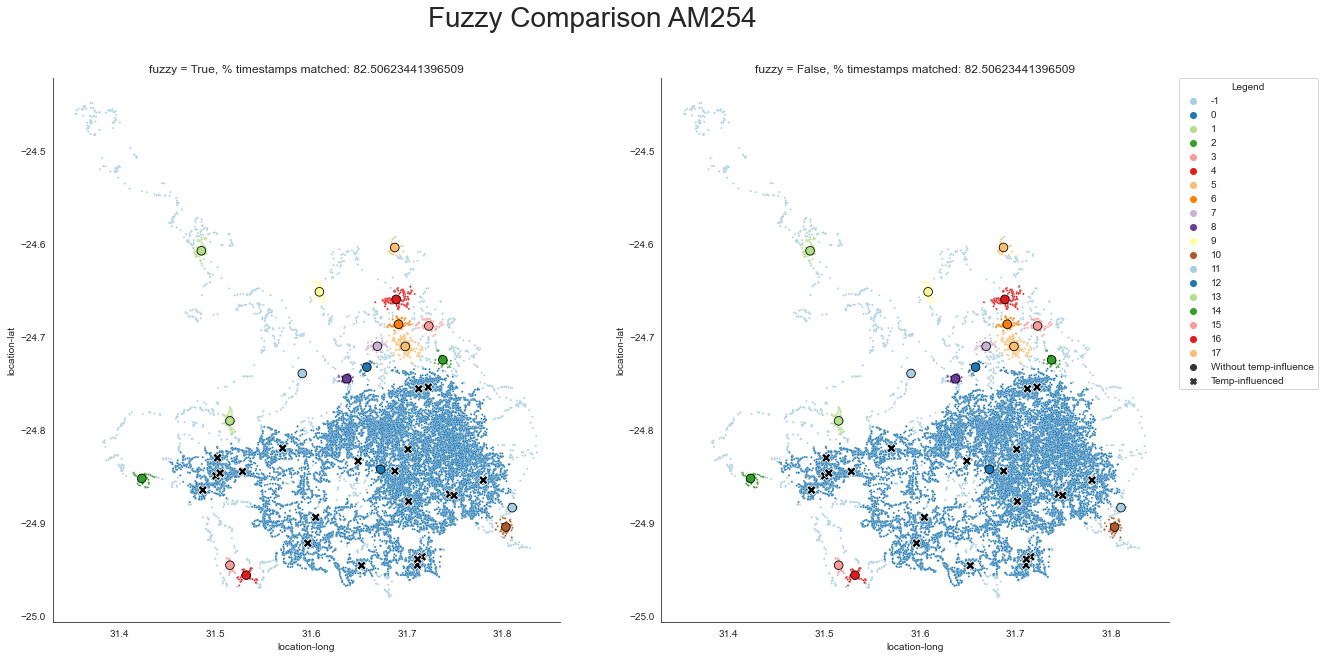

AM255
Using station data from Station(wmo = 68288) at distance 1.177
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  62.504%
Calculating temp-influenced clusters and centroids (11517, 13)
Calculating without-temp clusters and centroids (18426, 13)


No handles with labels found to put in legend.


Temp-Influenced centroids: 8
Without Temp-Influenced centroids: 20


AM255
Using station data from Station(wmo = 68288) at distance 1.177
Timestamps found:  62.504%
Calculating temp-influenced clusters and centroids (11517, 13)
Calculating without-temp clusters and centroids (18426, 13)
Temp-Influenced centroids: 8
Without Temp-Influenced centroids: 20




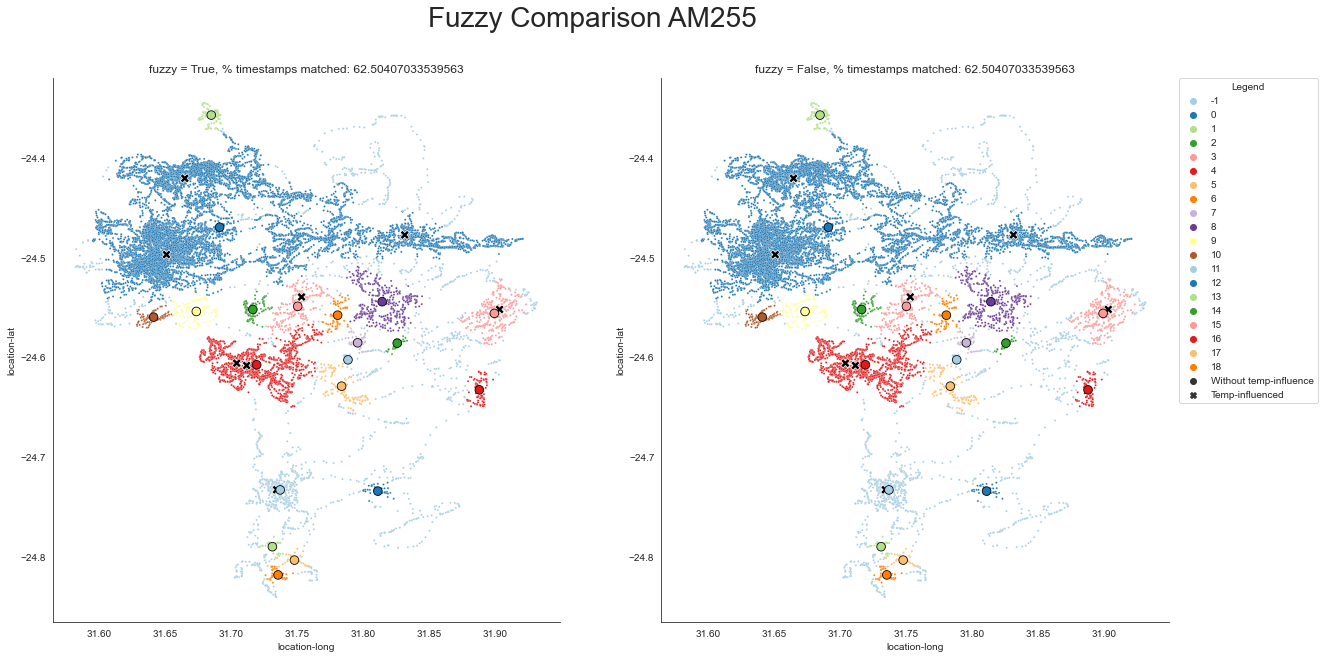

AM306
Using station data from Station(wmo = 67327) at distance 1.539
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  36.851%
Calculating temp-influenced clusters and centroids (3743, 13)
Calculating without-temp clusters and centroids (10157, 13)


No handles with labels found to put in legend.


Temp-Influenced centroids: 1
Without Temp-Influenced centroids: 15


AM306
Using station data from Station(wmo = 67327) at distance 1.539
Timestamps found:  10.515%
Calculating temp-influenced clusters and centroids (1068, 13)
Calculating without-temp clusters and centroids (10157, 13)
Temp-Influenced centroids: 1
Without Temp-Influenced centroids: 15




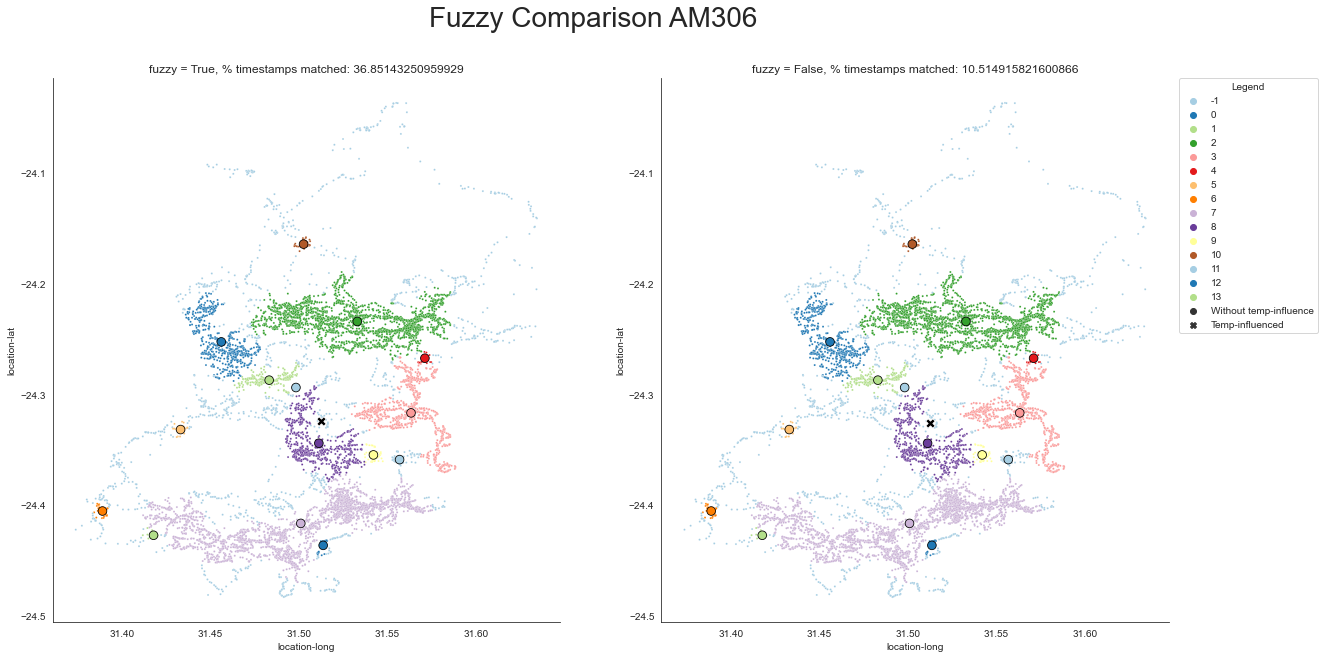

AM307
Using station data from Station(wmo = 68288) at distance 1.125
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  43.526%
Calculating temp-influenced clusters and centroids (8549, 13)
Calculating without-temp clusters and centroids (19641, 13)
Temp-Influenced centroids: 4
Without Temp-Influenced centroids: 27




No handles with labels found to put in legend.


AM307
Using station data from Station(wmo = 68288) at distance 1.125
Timestamps found:  43.526%
Calculating temp-influenced clusters and centroids (8549, 13)
Calculating without-temp clusters and centroids (19641, 13)
Temp-Influenced centroids: 4
Without Temp-Influenced centroids: 27




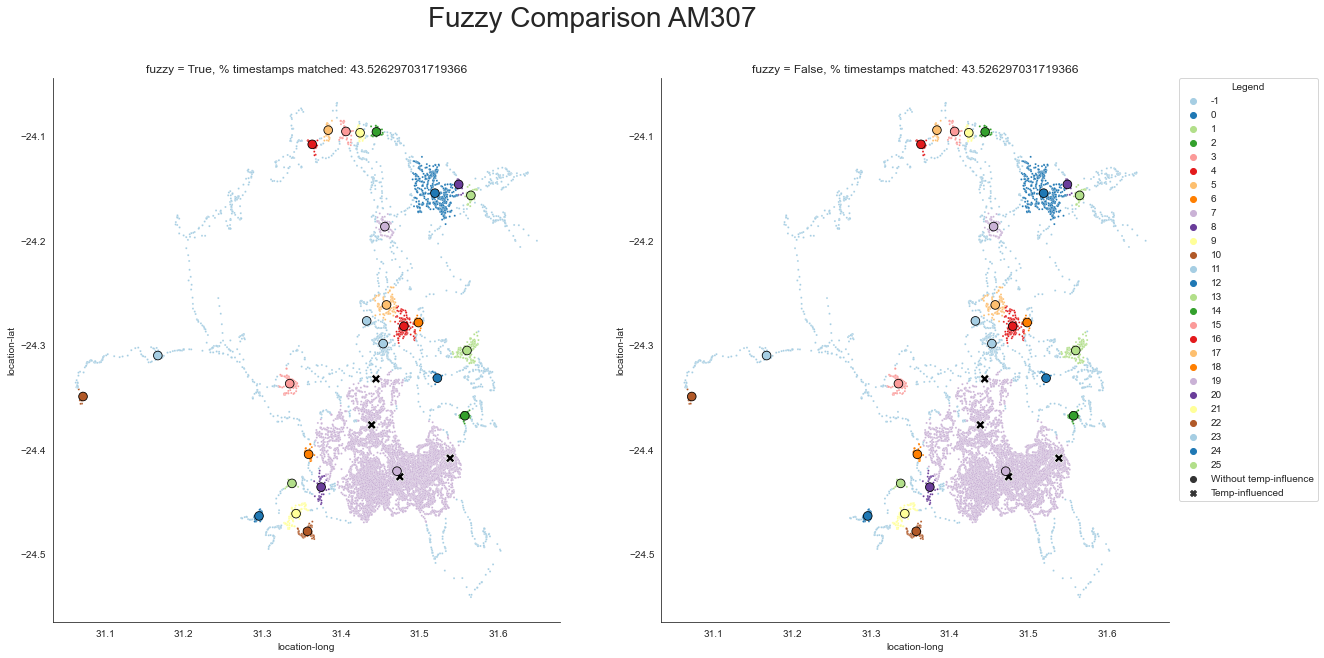

AM308
Using station data from Station(wmo = 68288) at distance 1.056
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  45.477%
Calculating temp-influenced clusters and centroids (7098, 13)
Calculating without-temp clusters and centroids (15608, 13)


No handles with labels found to put in legend.


Temp-Influenced centroids: 2
Without Temp-Influenced centroids: 7


AM308
Using station data from Station(wmo = 68288) at distance 1.056
Timestamps found:  45.477%
Calculating temp-influenced clusters and centroids (7098, 13)
Calculating without-temp clusters and centroids (15608, 13)
Temp-Influenced centroids: 2
Without Temp-Influenced centroids: 7




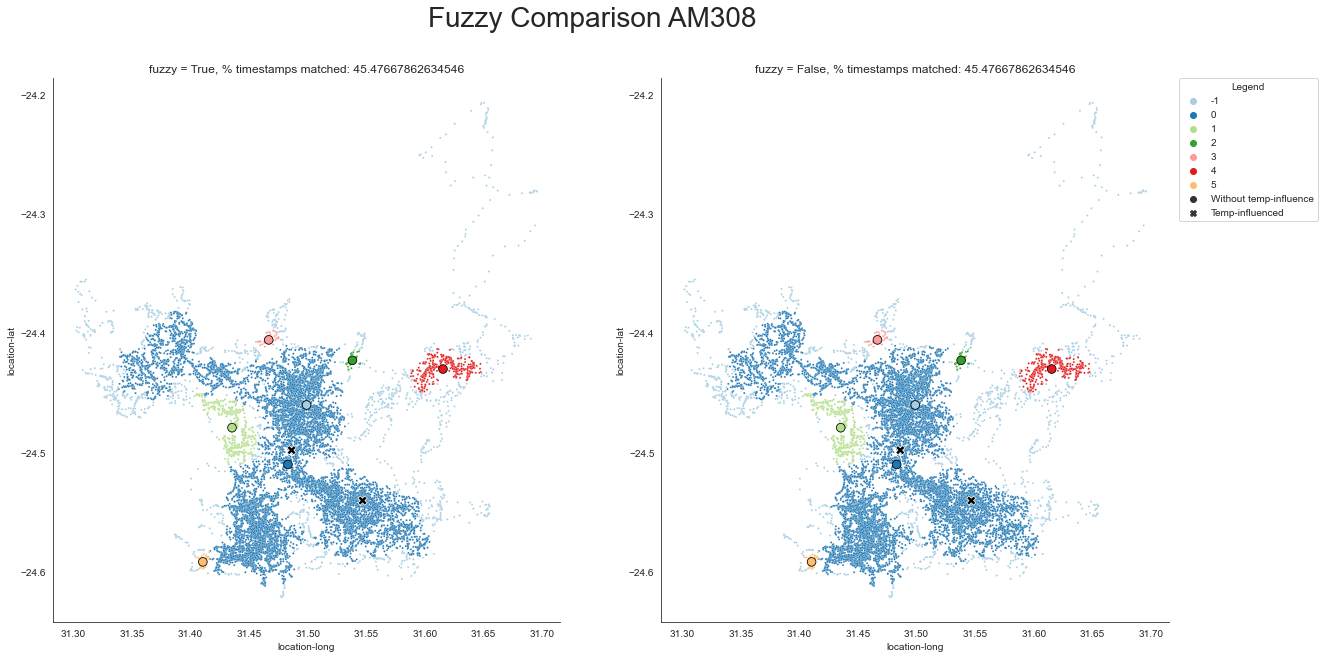

AM91
Using station data from Station(wmo = 68288) at distance 1.328
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  42.13%
Calculating temp-influenced clusters and centroids (13364, 13)
Calculating without-temp clusters and centroids (31721, 13)
Temp-Influenced centroids: 10
Without Temp-Influenced centroids: 10




No handles with labels found to put in legend.


AM91
Using station data from Station(wmo = 68288) at distance 1.328
Timestamps found:  2.853%
Calculating temp-influenced clusters and centroids (905, 13)
Calculating without-temp clusters and centroids (31721, 13)
Temp-Influenced centroids: 1
Without Temp-Influenced centroids: 10




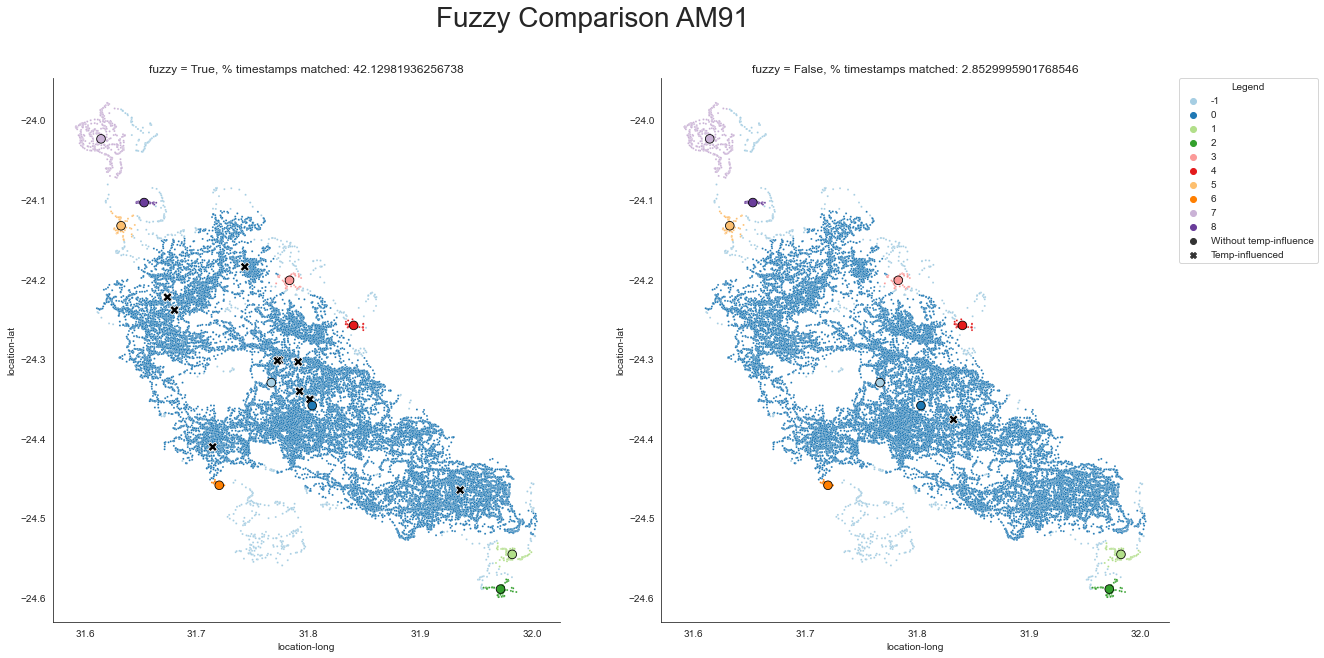

AM93
Using station data from Station(wmo = 68288) at distance 1.318
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  66.252%
Calculating temp-influenced clusters and centroids (13063, 13)
Calculating without-temp clusters and centroids (19717, 13)


No handles with labels found to put in legend.


Temp-Influenced centroids: 9
Without Temp-Influenced centroids: 8


AM93
Using station data from Station(wmo = 68288) at distance 1.318
Timestamps found:  66.252%
Calculating temp-influenced clusters and centroids (13063, 13)
Calculating without-temp clusters and centroids (19717, 13)
Temp-Influenced centroids: 9
Without Temp-Influenced centroids: 8




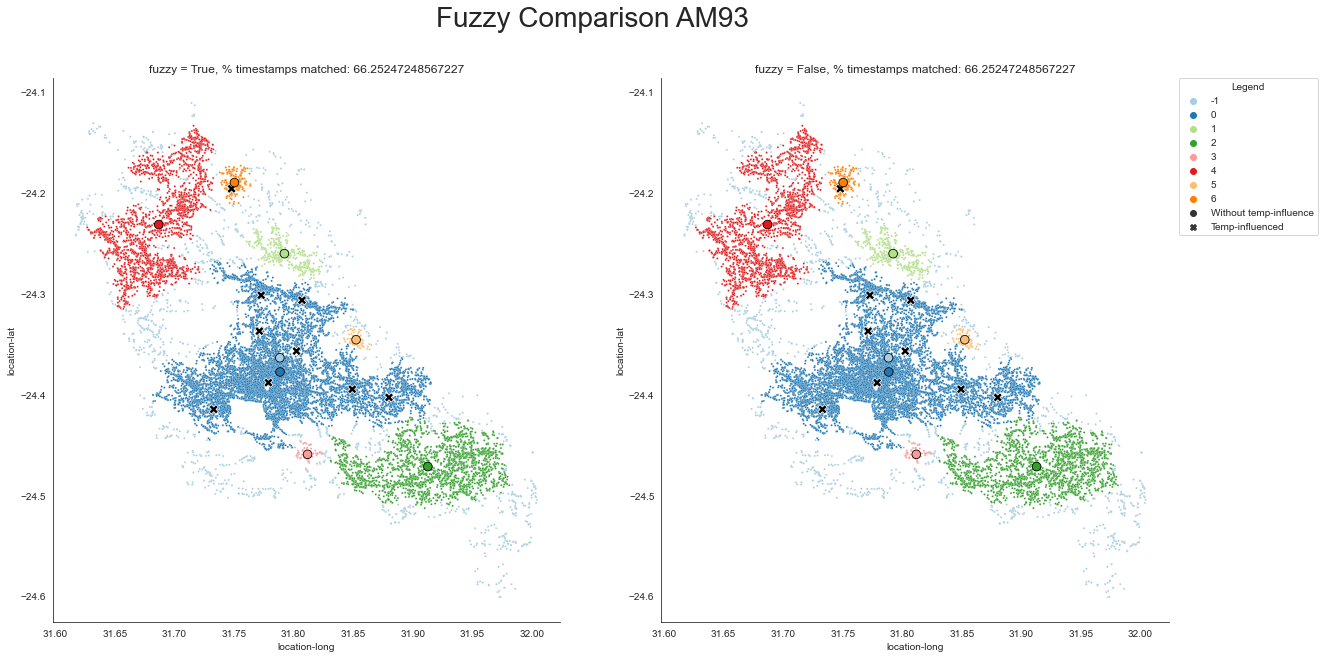

AM99
Using station data from Station(wmo = 68288) at distance 1.356
Fuzzy tolerance: 0 days 00:15:00
Timestamps found:  66.943%
Calculating temp-influenced clusters and centroids (21053, 13)
Calculating without-temp clusters and centroids (31449, 13)


No handles with labels found to put in legend.


Temp-Influenced centroids: 14
Without Temp-Influenced centroids: 10


AM99
Using station data from Station(wmo = 68288) at distance 1.356
Timestamps found:  66.943%
Calculating temp-influenced clusters and centroids (21053, 13)
Calculating without-temp clusters and centroids (31449, 13)
Temp-Influenced centroids: 14
Without Temp-Influenced centroids: 10




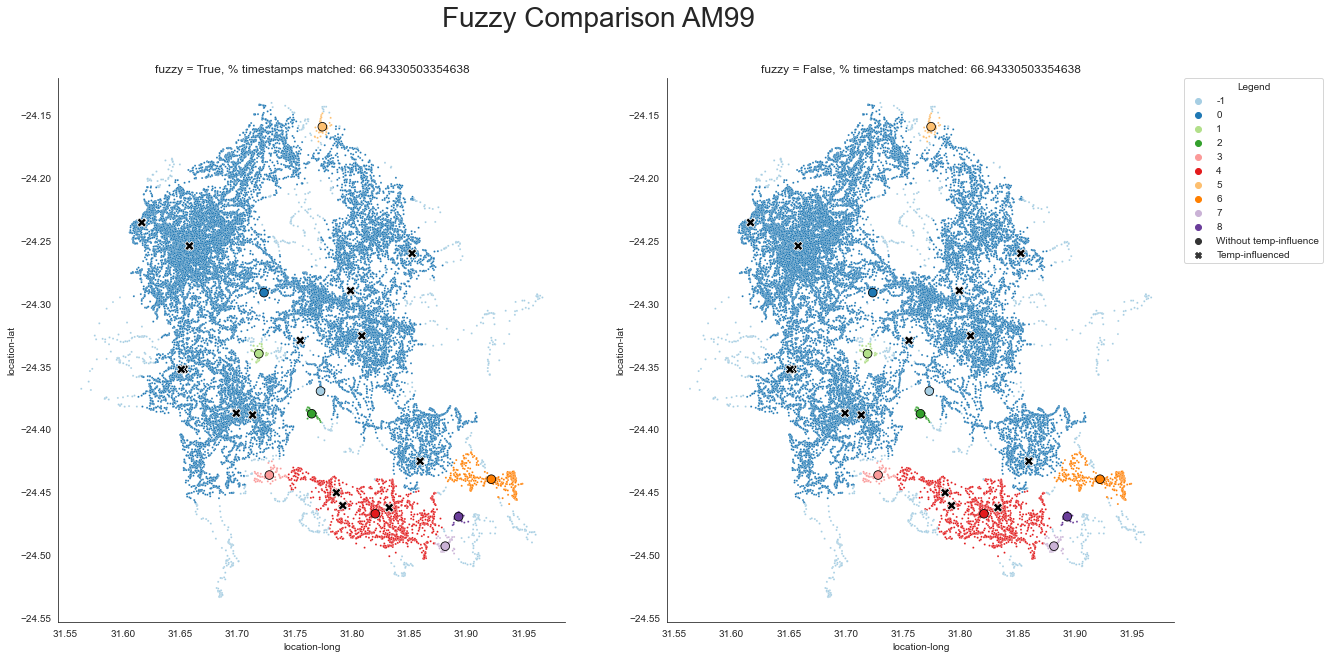

In [4]:
%matplotlib inline

all_centroids = []

for id in data["tag-local-identifier"].unique():
    data_subset = data[data["tag-local-identifier"] == id]
    
    # plotting
    fig, axs = plt.subplots(1, 2, figsize=(20,10))
    
    fig.suptitle(f"Fuzzy Comparison {id}", fontsize=28)
    
    for i, fuzzy in enumerate([True, False]):
        
        # the heavy lifting
        centroids, clusters, percents_found = run_algorithm(data_subset, fuzzy=fuzzy)
        
        if centroids is not None:
            centroids["fuzzy"] = fuzzy
            all_centroids.append(centroids)
            plot_range(clusters, centroids, ax=axs[i], show=False)
            axs[i].set_title(f"fuzzy = {fuzzy}, % timestamps matched: {percents_found[0]}")
            
    legend1 = axs[0].get_legend()
    if legend1:
        legend1.remove()
    plt.show()

Finally, we save the centroids to a json file to be used later in the streamlit application.

In [5]:
all_centroids = pd.concat(all_centroids, ignore_index=True)
all_centroids = gpd.GeoDataFrame(all_centroids, geometry="geometry")
all_centroids.to_file('kruger_centroids.json')
all_centroids

location-long  location-lat  stationTemp  cluster  \
0        31.821943    -24.766470    24.148392       -1   
1        31.888330    -24.806790    21.240551        0   
2        31.829823    -24.499682    23.469949        1   
3        31.755801    -24.532454    23.352518        2   
4        31.850108    -24.897251    24.488732        3   
..             ...           ...          ...      ...   
630      31.820453    -24.467570          NaN        4   
631      31.774243    -24.159398          NaN        5   
632      31.921773    -24.440052          NaN        6   
633      31.881552    -24.493373          NaN        7   
634      31.893196    -24.469930          NaN        8   

                       geometry           feature space tag-local-identifier  \
0    POINT (31.82194 -24.76647)         Temp-influenced                AM105   
1    POINT (31.88833 -24.80679)         Temp-influenced                AM105   
2    POINT (31.82982 -24.49968)         Temp-influenced                AM105   
3    POINT (31.75580 -24.53245)         Temp-influenced                AM105   
4    POINT (31.85011 -24.89725)         Temp-influenced                AM105   
..                          ...                     ...                  ...   
630  POINT (31.82045 -24.46757)  Without temp-influence                 AM99   
631  POINT (31.77424 -24.15940)  Without temp-influence                 AM99   
632  POINT (31.92177 -24.44005)  Without temp-influence                 AM99   
633  POINT (31.88155 -24.49337)  Without temp-influence                 AM99   
634  POINT (31.89320 -24.46993)  Without temp-influence                 AM99   

     fuzzy  
0     True  
1     True  
2     True  
3     True  
4     True  
..     ...  
630  False  
631  False  
632  False  
633  False  
634  False  

[635 rows x 8 columns]